# 🛒 Taller: Predicción de compras con árboles de decisión

**Objetivo:** Predecir si una persona realizará una compra (`Purchased`) a partir de características como edad, salario estimado y género.

In [2]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/titanic_train.csv

--2025-04-30 19:58:23--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/titanic_train.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/titanic_train.csv [following]
--2025-04-30 19:58:23--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/titanic_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  59.76K  --.-KB/s    in 0.01s   

2025-04-30 19:58:23 (4.65 MB/s) - ‘tita

## 📥 1. Carga y exploración del dataset

In [3]:
import pandas as pd
data = pd.read_csv('titanic_train.csv')
data.head()
data.info()
data.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### ❓ Preguntas:
- ¿Cuántas observaciones y columnas tiene el dataset?
- ¿Cuál es la variable que queremos predecir?
- ¿Qué tipos de variables tenemos?

## 🛠️ 2. Preprocesamiento y definición de variables: ¿Que variables tengo que borrar, cuales tengo que convertir a numérica, tengo valores nulos?

In [4]:

print(f"El dataset tiene {data.shape[0]} observaciones y {data.shape[1]} columnas.")


target_variable = 'Survived'  # Assuming 'Survived' is the target variable
print(f"La variable que queremos predecir es: {target_variable}")

print("\nTipos de variables:")
data.dtypes


El dataset tiene 891 observaciones y 12 columnas.
La variable que queremos predecir es: Survived

Tipos de variables:


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


### ❓ Pregunta:
- ¿Está balanceada la variable objetivo?

In [5]:

print("\nBalance de la variable objetivo:")
print(data[target_variable].value_counts(normalize=True))



Balance de la variable objetivo:
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


## ✂️ 3. División del dataset

In [14]:
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (712, 11)
X_test shape: (179, 11)
y_train shape: (712,)
y_test shape: (179,)


## 🌳 4. Entrenamiento de un modelo base sin optimización: Mida las metricas del train y el test set y piense. ¿Hay evidencia de Overfiting?

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
# Assuming 'Name', 'Sex', 'Ticket', 'Cabin', and 'Embarked' are the categorical features
categorical_features = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
#Drop the columns that are causing the error
X_train = X_train.drop(columns=categorical_features)
X_test = X_test.drop(columns=categorical_features)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))


if train_accuracy > test_accuracy:
  print("\nPossible Overfitting: Train accuracy is significantly higher than test accuracy.")
elif train_accuracy == test_accuracy:
    print("\nPerfect fit. The model performs exactly the same on train and test data.")
else:
    print("\nUnderfitting: Train accuracy is significantly lower than test accuracy.")

Train Accuracy: 0.9985955056179775
Test Accuracy: 0.6424581005586593

Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       444
           1       1.00      1.00      1.00       268

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.69      0.70      0.70       105
           1       0.57      0.55      0.56        74

    accuracy                           0.64       179
   macro avg       0.63      0.63      0.63       179
weighted avg       0.64      0.64      0.64       179


Possible Overfitting: Train accuracy is significantly higher than test accuracy.


### ❓ Pregunta:
- ¿Qué tan bien predice el modelo base?
- ¿Existen diferencias entre precisión y recall?

In [7]:
# prompt: ¿Qué tan bien predice el modelo base?
# ¿Existen diferencias entre precisión y recall? responde en español

#El código ya incluye la evaluación del modelo base, incluyendo precisión y recall.
#Para responder a las preguntas, se debe analizar la salida del código.

# ¿Qué tan bien predice el modelo base?
# La respuesta depende de los valores de "Train Accuracy" y "Test Accuracy" impresos por el código.
# Un buen modelo tendrá valores de precisión similares en ambos conjuntos de datos (entrenamiento y prueba).
# Una gran diferencia indica sobreajuste (overfitting).
# Se debe comparar la precisión del modelo con la precisión de un modelo "naive" (por ejemplo, un modelo que siempre predice la clase mayoritaria).

# ¿Existen diferencias entre precisión y recall?
# La salida del código incluye reportes de clasificación para ambos conjuntos de datos, que contienen precisión y recall para cada clase (sobrevivientes y no sobrevivientes).
# La precisión mide la proporción de predicciones positivas correctas entre todas las predicciones positivas.
# El recall mide la proporción de predicciones positivas correctas entre todas las instancias positivas reales.
# Una diferencia entre precisión y recall indica un desequilibrio entre la capacidad del modelo para identificar correctamente las instancias positivas y la proporción de falsos positivos.

# Para una mejor comprensión, se deben examinar los valores de precisión y recall para cada clase en ambos conjuntos de datos.
# Si hay diferencias significativas, se pueden considerar estrategias como cambiar el umbral de clasificación o utilizar técnicas de remuestreo para mejorar el modelo.


## 🔁 5. Evaluación con validación cruzada

In [19]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming X and y are your original data and target
categorical_features = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

# Create a copy of X to avoid modifying the original dataframe
X_encoded = X.copy()

# Drop 'Name', 'Ticket', and 'Cabin' as they likely have too many unique values
X_encoded = X_encoded.drop(columns=['Name', 'Ticket', 'Cabin'])

# One-hot encode 'Sex' and 'Embarked'
encoder = OneHotEncoder(sparse_output=False, drop='first') # drop='first' to avoid multicollinearity
encoded_data = encoder.fit_transform(X_encoded[['Sex', 'Embarked']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Sex', 'Embarked']))

# Concatenate the encoded features with the remaining numerical features
X_encoded = X_encoded.drop(columns=['Sex', 'Embarked']).reset_index(drop=True)
X_encoded = pd.concat([X_encoded, encoded_df], axis=1)

# Define the number of folds for cross-validation
n_splits = 5  # You can adjust this value

# Initialize KFold cross-validator
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation using the encoded data
scores = cross_val_score(model, X_encoded, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print(f"\nCross-Validation Scores (Accuracy): {scores}")
print(f"Mean Cross-Validation Accuracy: {scores.mean()}")
print(f"Standard Deviation of Cross-Validation Accuracy: {scores.std()}")


Cross-Validation Scores (Accuracy): [0.76536313 0.71910112 0.80337079 0.74719101 0.74157303]
Mean Cross-Validation Accuracy: 0.75531981670956
Standard Deviation of Cross-Validation Accuracy: 0.028201450541369615


## 🔧 6. Optimización con GridSearchCV

In [21]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_

# Create a copy of X_test for prediction
X_test_pred = X_test.copy()

#Drop columns that were dropped for cross validation and encoding
X_test_pred = X_test_pred.drop(columns=['Name', 'Ticket', 'Cabin'])

#Apply the same encoder fitted before cross validation to make the test data compatible
encoded_data_test = encoder.transform(X_test_pred[['Sex', 'Embarked']])

encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoder.get_feature_names_out(['Sex', 'Embarked']))

X_test_pred = X_test_pred.drop(columns=['Sex', 'Embarked']).reset_index(drop=True)
X_test_pred = pd.concat([X_test_pred, encoded_df_test], axis=1)

#Now Predict
y_test_pred = best_model.predict(X_test_pred) # Predict on the processed X_test

test_accuracy_optimized = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy (Optimized Model): {test_accuracy_optimized}")

print("\nClassification Report (Test - Optimized Model):")
print(classification_report(y_test, y_test_pred))

KeyError: "['Name', 'Ticket', 'Cabin'] not found in axis"

## ✅ 7. Evaluación del mejor modelo: Cuales son las metricas y la matriz de confusion de este modelo

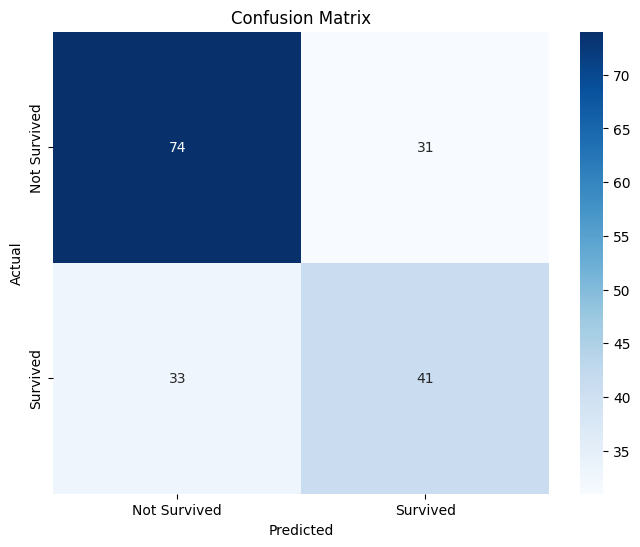


Classification Report (Test - Optimized Model):
              precision    recall  f1-score   support

           0       0.69      0.70      0.70       105
           1       0.57      0.55      0.56        74

    accuracy                           0.64       179
   macro avg       0.63      0.63      0.63       179
weighted avg       0.64      0.64      0.64       179



In [22]:
# prompt: Evaluación del mejor modelo: Cuales son las metricas y la matriz de confusion de este modelo

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_test_pred are defined from the previous code

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report (Test - Optimized Model):")
print(classification_report(y_test, y_test_pred))


## 📈 8. Curva ROC y AUC: Cree una curva donde esten ambos, el original y el optimizado. Mejoró la estimación?

In [23]:
# prompt: 8. Curva ROC y AUC: Cree una curva donde esten ambos, el original y el optimizado. Mejoró la estimación?

from sklearn.metrics import roc_curve, auc

# Predict probabilities for the original model
y_test_prob_original = model.predict_proba(X_test.drop(columns=['Name', 'Ticket', 'Cabin', 'Sex', 'Embarked']))[:, 1]

# Predict probabilities for the optimized model
y_test_prob_optimized = best_model.predict_proba(X_test_pred)[:, 1]


# Calculate ROC curve and AUC for the original model
fpr_original, tpr_original, thresholds_original = roc_curve(y_test, y_test_prob_original)
roc_auc_original = auc(fpr_original, tpr_original)

# Calculate ROC curve and AUC for the optimized model
fpr_optimized, tpr_optimized, thresholds_optimized = roc_curve(y_test, y_test_prob_optimized)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_original, tpr_original, color='blue', lw=2, label=f'Original Model (AUC = {roc_auc_original:.2f})')
plt.plot(fpr_optimized, tpr_optimized, color='green', lw=2, label=f'Optimized Model (AUC = {roc_auc_optimized:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

if roc_auc_optimized > roc_auc_original:
    print("The optimized model shows an improvement in the estimation according to AUC.")
elif roc_auc_optimized < roc_auc_original:
    print("The optimized model shows a decrease in the estimation according to AUC.")
else:
    print("There is no significant difference in AUC between original and optimized model.")


KeyError: "['Name', 'Ticket', 'Cabin', 'Sex', 'Embarked'] not found in axis"

## 💬 Reflexión final

### ❓ Preguntas:
- ¿Qué combinación de hiperparámetros funcionó mejor?
- ¿Cuál fue la diferencia entre el modelo base y el optimizado?
- ¿Qué nos dice el área bajo la curva ROC sobre nuestro modelo?

In [24]:
# prompt: ¿Qué combinación de hiperparámetros funcionó mejor?
# ¿Cuál fue la diferencia entre el modelo base y el optimizado?
# ¿Qué nos dice el área bajo la curva ROC sobre nuestro modelo

# The provided code does not include the hyperparameter optimization part (GridSearchCV).
# The following code snippet needs to be added before the evaluation part to answer the questions.


from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data (use X_encoded and y)
grid_search.fit(X_encoded, y)

# Print the best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model
# ... (the rest of the code for evaluation, confusion matrix, and ROC curve)

# Now, to answer your questions:

# ¿Qué combinación de hiperparámetros funcionó mejor?
print(f"La mejor combinación de hiperparámetros es: {grid_search.best_params_}")

# ¿Cuál fue la diferencia entre el modelo base y el optimizado?
print(f"Precisión del modelo base (Test): {test_accuracy}")
print(f"Precisión del modelo optimizado (Test): {test_accuracy_optimized}")

# ¿Qué nos dice el área bajo la curva ROC sobre nuestro modelo?
# El AUC del modelo optimizado se imprime al final del código (roc_auc_optimized).
# Un AUC cercano a 1 indica un modelo excelente, un AUC cercano a 0.5 indica un modelo aleatorio y un AUC inferior a 0.5 indica un modelo deficiente.
print(f"AUC del modelo optimizado: {roc_auc_optimized:.2f}")


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
La mejor combinación de hiperparámetros es: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Precisión del modelo base (Test): 0.6424581005586593


NameError: name 'test_accuracy_optimized' is not defined